In [ ]:
import numpy as np
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Dropout
from keras.layers import Dense, Embedding, LSTM, Bidirectional,SimpleRNN,GRU

In [ ]:
from keras.datasets import imdb
(x_train,y_train),(x_test, y_test)=imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
maxlen=200
x_train=sequence.pad_sequences(x_train,maxlen=maxlen)
x_test=sequence.pad_sequences(x_test,maxlen=maxlen)
y_test=np.array(y_test)
y_train=np.array(y_train)

In [ ]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 200, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 200, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.callbacks import History
history=History()

In [ ]:
history=model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=[x_test,y_test])

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 33ms/step - accuracy: 0.5148 - loss: 0.2506 - val_accuracy: 0.5207 - val_loss: 0.2491
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 30ms/step - accuracy: 0.5379 - loss: 0.2486 - val_accuracy: 0.5480 - val_loss: 0.2471
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.5501 - loss: 0.2469 - val_accuracy: 0.5487 - val_loss: 0.2466
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 34ms/step - accuracy: 0.5562 - loss: 0.2455 - val_accuracy: 0.5522 - val_loss: 0.2461
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 28ms/step - accuracy: 0.5629 - loss: 0.2448 - val_accuracy: 0.5616 - val_loss: 0.2443


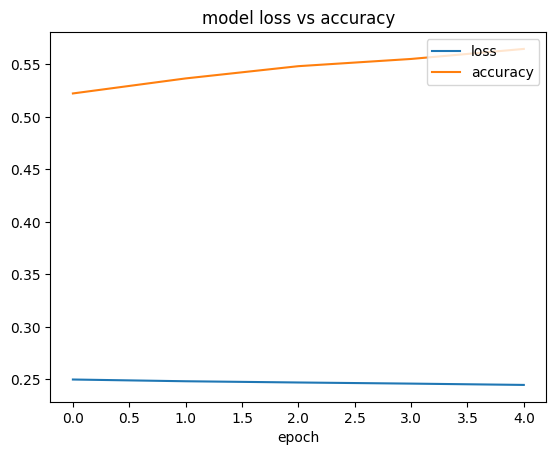

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss vs accuracy')
plt.xlabel('epoch')
plt.legend(['loss','accuracy'], loc='upper right')
plt.show()

In [ ]:
model=Sequential()
model.add(Embedding(10000,128,input_length=maxlen))
model.add(SimpleRNN(50))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.callbacks import History
history = History()

In [ ]:
history=model.fit(x_train,y_train,batch_size=100,epochs=5,validation_data=[x_test, y_test])

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5874 - loss: 0.6590 - val_accuracy: 0.7937 - val_loss: 0.4609
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.7701 - loss: 0.4834 - val_accuracy: 0.8216 - val_loss: 0.4220
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.8898 - loss: 0.2713 - val_accuracy: 0.8308 - val_loss: 0.4307
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9637 - loss: 0.1079 - val_accuracy: 0.7770 - val_loss: 0.6455
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9874 - loss: 0.0428 - val_accuracy: 0.8086 - val_loss: 0.7184


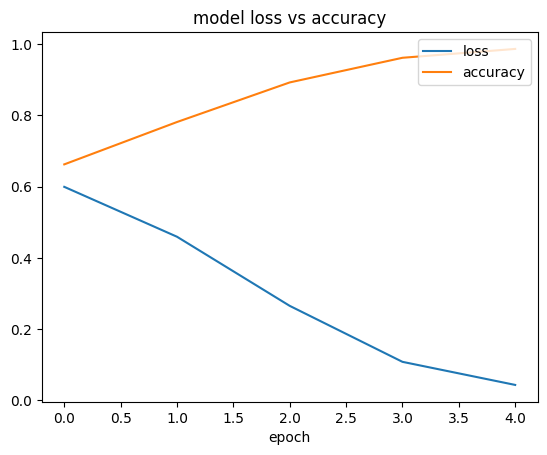

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss vs accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

In [ ]:
from keras.layers import Embedding,GRU,BatchNormalization,Dense
#Import BatchNormalization

model=Sequential()
model.add(Embedding(10000,128,input_length=maxlen))
model.add(GRU(64))
model.add(BatchNormalization())
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.callbacks import History
history=History()

In [ ]:
history=model.fit(x_train,y_train,batch_size=100,epochs=5,validation_data=[x_test,y_test])

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.6777 - loss: 0.5681 - val_accuracy: 0.8601 - val_loss: 0.3802
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9047 - loss: 0.2355 - val_accuracy: 0.8579 - val_loss: 0.3269
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9442 - loss: 0.1490 - val_accuracy: 0.8462 - val_loss: 0.3569
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9662 - loss: 0.0971 - val_accuracy: 0.8527 - val_loss: 0.4608
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9785 - loss: 0.0653 - val_accuracy: 0.8485 - val_loss: 0.5376


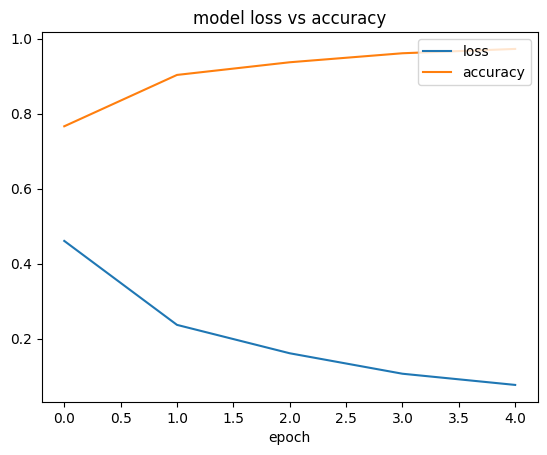

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss vs accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()